In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

In [56]:
path = "../../build/gpu/benchmark/"
data = np.genfromtxt(path + 'transmission_log.txt', skip_header=1)
transmission_ratio = data[:, 1] / (data[:, 1] + data[:, 2])
hits_to_transmission = data[:, 3] / data[:, 1]
hits_to_reflection = data[:, 4] / data[:, 2]
lr = data[:, 0]

In [57]:
greenwood_data_str = """
0.001 10000000 0.99949 0.00001 0.99968 0.00001 0.02
0.01 10000000 0.99505 0.00005 0.99680 0.00006 0.18
0.03 10000000 0.9853 0.0001 0.9907 0.0001 0.54
0.1 10000000 0.9522 0.0002 0.9693 0.0001 1.8
0.3 10000000 0.8702 0.0003 0.9148 0.0002 5.1
1 10000000 0.6718 0.0005 0.7688 0.0003 14.4
3 10000000 0.4183 0.0004 0.5449 0.0004 30
10 1000000 0.188 0.001 0.2939 0.0013 56
30 1000000 0.076 0.001 0.137 0.001 82
100 10000 0.025 0.002 0.050 0.002 99
300 10000 0.011 0.001 0.021 0.001 93
1000 10000 0.0028 0.0003 0.0083 0.0005 196
"""
greenwood_data = np.genfromtxt(greenwood_data_str.splitlines())
gw_data = greenwood_data[:,2]
# fit a spline to the greenwood data for smoother curves
spline = UnivariateSpline(np.log(greenwood_data[:,0]), gw_data, s=0)

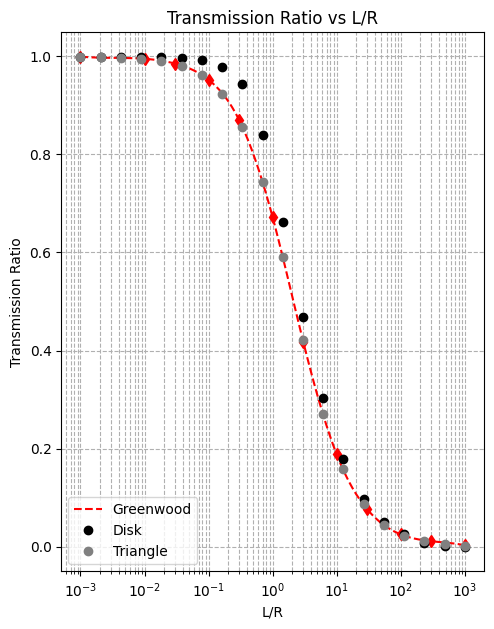

In [62]:
plt.figure(figsize=(12, 7))

lr_fine = np.logspace(-3, 3, 100)
gw_smooth = spline(np.log(lr_fine)) 
plt.subplot(1, 2, 1)
plt.plot(greenwood_data[:, 0], greenwood_data[:, 2], 'd', color='red')
plt.plot(lr_fine, gw_smooth, '--', label='Greenwood', color='red')

data = np.genfromtxt(path + 'transmission_log_disk_GPU.txt', skip_header=1)
transmission_ratio = data[:, 1] / (data[:, 1] + data[:, 2])
lr = data[:, 0]
plt.plot(lr, transmission_ratio, 'o', label='Disk', color="black")

data = np.genfromtxt(path + 'transmission_log_tri_CPU.txt', skip_header=1)
transmission_ratio = data[:, 1] / (data[:, 1] + data[:, 2])
lr = data[:, 0]
plt.plot(lr, transmission_ratio, 'o', label='Triangle', color="gray")

plt.xscale('log')
plt.xlabel('L/R')
plt.ylabel('Transmission Ratio')
plt.title('Transmission Ratio vs L/R')
# plt.ylim(0, 1)
# plt.xlim(0.001, 1000)
plt.legend(loc="lower left")
plt.grid(True, which="both", ls="--")   
plt.show()

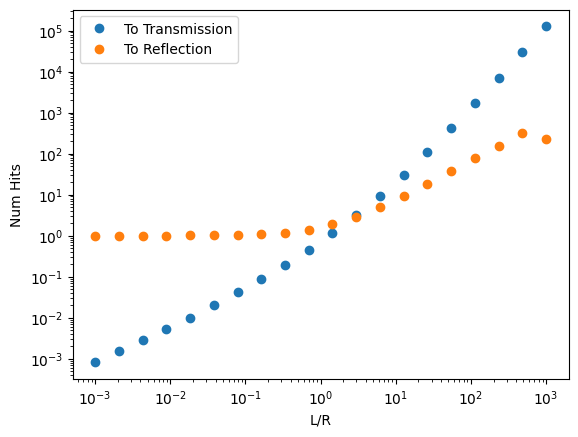

In [63]:
plt.plot(lr, hits_to_transmission, 'o', label='To Transmission')
plt.plot(lr, hits_to_reflection, 'o', label='To Reflection')
plt.xscale('log')
plt.yscale('log')

plt.xlabel('L/R')
plt.ylabel('Num Hits')
plt.legend()
plt.show()